In [1]:
from load_dataset import load_diabetes_dataset
from model_manager import PytorchModelManager
from cf_engine.engine import CFEnginePytorch
from cf_engine.counterfactual import CounterfactualExampleBySubset

In [2]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
dataset = load_diabetes_dataset()
mm = PytorchModelManager(dataset)
dm = mm.get_dir_manager()
try:
    mm.load_model()
except FileNotFoundError:
    mm.train()
    mm.save_model()
engine = CFEnginePytorch(mm, dataset)

/Users/chengfurui/Projects/counterfactuals/cf_ml/dataset.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = (data_df[col] - minx)/(maxx-minx)


In [4]:
x = dataset.get_train_dataset(preprocess=False)[dataset.get_feature_names()].values

In [5]:
filters = [('Glucose', 0, 94, True)]
# filters = []
attr_range = {'Glucose': {'min': 80, 'max': 200}}
setting = {'index': 'train', 'changeable_attribute': 'all', 'attr_range': attr_range,
           'filters': filters, 'cf_num': 1, 'desired_class': 'opposite', 'weight': 'mads', 'k': -1}
subset_cf = engine.generate_cfs_from_setting(setting, use_cache=False, batch_size=2,\
                                             proximity_weight=0.01, diversity_weight=0,\
                                             loss_diff=1e-6, post_step=10, cache=False)

/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/chengfurui/Projects/counterfactuals/cf_ml/dataset.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[target_col] = self.description[target_col]['category'][0]
/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

[2/116]  Epoch-0, time cost: 1.336s, loss: 4.470, iteration: 2000, validation rate: 1.000
[4/116]  Epoch-1, time cost: 0.938s, loss: 2.647, iteration: 1413, validation rate: 1.000
[6/116]  Epoch-2, time cost: 1.339s, loss: 3.956, iteration: 2000, validation rate: 1.000
[8/116]  Epoch-3, time cost: 1.323s, loss: 4.159, iteration: 2000, validation rate: 1.000
[10/116]  Epoch-4, time cost: 0.687s, loss: 4.496, iteration: 1024, validation rate: 1.000
[12/116]  Epoch-5, time cost: 1.206s, loss: 3.814, iteration: 2000, validation rate: 1.000
[14/116]  Epoch-6, time cost: 1.209s, loss: 3.776, iteration: 2000, validation rate: 1.000
[16/116]  Epoch-7, time cost: 1.225s, loss: 3.801, iteration: 2000, validation rate: 1.000
[18/116]  Epoch-8, time cost: 0.852s, loss: 1.631, iteration: 1321, validation rate: 1.000
[20/116]  Epoch-9, time cost: 1.061s, loss: 4.197, iteration: 1657, validation rate: 1.000
[22/116]  Epoch-10, time cost: 0.996s, loss: 2.928, iteration: 1630, validation rate: 1.000
[2

In [6]:
feature = dataset.get_feature_names(False)
des = dataset.get_description()
cfs = subset_cf.get_cf()
instances = subset_cf.get_instance()
neg_instances = instances[instances['Outcome'] == 0]
valid_pos_cf = cfs[cfs['OriginIndex'].isin(neg_instances.index) & (cfs['Outcome'] == 1)]
# difference between cfs and original instances
diff = valid_pos_cf.reset_index(drop=True)[feature] - \
    neg_instances.reset_index(drop=True)[feature]
diff.index = valid_pos_cf['OriginIndex']
normed_diff = diff.copy()
for f in feature:
    normed_diff[f] = diff[f] / (des[f]['max'] - des[f]['min'])

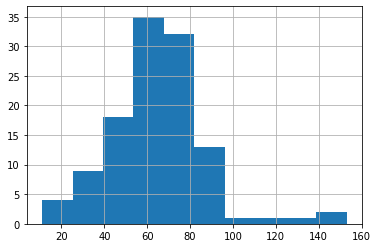

In [15]:
diff['Glucose'].histst()

In [9]:
valid_pos_cf[valid_pos_cf['Glucose'] < 93]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex


In [10]:
filters = [('Glucose', 94, 200, True), ('Age', 42, 200, True)]
# filters = []
attr_range = {'Glucose': {'min': 80, 'max': 150}}
setting = {'index': 'train', 'changeable_attribute': 'all', 'attr_range': attr_range,
           'filters': filters, 'cf_num': 1, 'desired_class': 'opposite', 'weight': 'mads'}
subset_cf = engine.generate_cfs_from_setting(setting, use_cache=False, batch_size=2,\
                                             proximity_weight=0.01, diversity_weight=0,\
                                             loss_diff=1e-6, cache=False)

/Users/chengfurui/Projects/counterfactuals/cf_ml/dataset.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = (data_df[col] - minx)/(maxx-minx)
/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/chengfurui/Projects/counterfactuals/cf_ml/dataset.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

[2/131]  Epoch-0, time cost: 0.414s, loss: 1.307, iteration: 526, validation rate: 1.000
[4/131]  Epoch-1, time cost: 0.524s, loss: 2.164, iteration: 802, validation rate: 1.000
[6/131]  Epoch-2, time cost: 0.437s, loss: 0.646, iteration: 616, validation rate: 1.000
[8/131]  Epoch-3, time cost: 0.375s, loss: 1.493, iteration: 544, validation rate: 1.000
[10/131]  Epoch-4, time cost: 0.495s, loss: 1.870, iteration: 753, validation rate: 1.000
[12/131]  Epoch-5, time cost: 0.690s, loss: 1.418, iteration: 1135, validation rate: 1.000
[14/131]  Epoch-6, time cost: 0.430s, loss: 1.160, iteration: 598, validation rate: 1.000
[16/131]  Epoch-7, time cost: 0.587s, loss: 0.424, iteration: 948, validation rate: 1.000
[18/131]  Epoch-8, time cost: 0.618s, loss: 0.577, iteration: 980, validation rate: 1.000
[20/131]  Epoch-9, time cost: 0.325s, loss: 2.442, iteration: 469, validation rate: 1.000
[22/131]  Epoch-10, time cost: 0.585s, loss: 1.832, iteration: 925, validation rate: 1.000
[24/131]  Ep

In [11]:
cfs = subset_cf.get_cf()
instances = subset_cf.get_instance()
pos_instances = instances[instances['Outcome'] == 1]
valid_neg_cf = cfs[cfs['OriginIndex'].isin(neg_instances.index) & (cfs['Outcome'] == 0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13785cb38>,
      dtype=object)

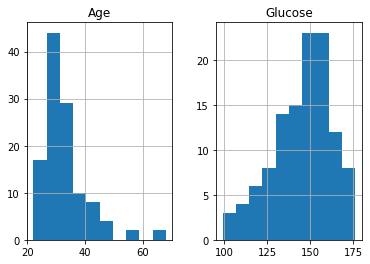

In [12]:
valid_pos_cf[['Glucose', 'Age']].hist()

In [13]:
valid_pos_cf['Glucose'].min()

99.0

In [14]:
valid_pos_cf[valid_pos_cf['Age'] > 42]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
0,12.0,113.0,74.0,40.0,54.0,35.299999,0.380,48.0,1,1,0.508691,358
1,6.0,137.0,62.0,32.0,126.0,32.000000,0.085,46.0,1,1,0.509827,567
1,0.0,104.0,76.0,0.0,0.0,48.200001,0.194,46.0,1,1,0.518214,596
0,8.0,140.0,82.0,0.0,0.0,35.599998,0.587,68.0,1,1,0.507562,674
0,10.0,105.0,85.0,32.0,0.0,36.200001,0.825,56.0,1,1,0.500301,542
0,12.0,118.0,62.0,7.0,258.0,27.600000,0.926,44.0,1,1,0.513035,254
0,9.0,155.0,68.0,0.0,0.0,26.700001,0.210,58.0,1,1,0.523839,512
0,12.0,128.0,72.0,31.0,0.0,29.700001,0.297,46.0,1,1,0.508547,510
0,0.0,107.0,60.0,0.0,0.0,36.299999,0.735,67.0,1,1,0.502050,537
